# `Customer Segmentation Analysis` 
- Customer segmentation is crucial for any business looking to optimize its customer relationships. In this project, we aim to segment customers into distinct groups based on their shared characteristics, such as buying behavior and preferences. By doing so, we can tailor our products and services to better meet the unique needs of each group, improve customer satisfaction, and ultimately increase sales.

- Our focus will be on a UK-based non-store online retailer that specializes in unique all-occasion gifts, serving both retail and wholesale customers. We will analyze a transnational dataset spanning from 01/12/2010 to 09/12/2011, which includes all customer transactions during that period. Through customer segmentation, we can gain valuable insights into the different behaviors and concerns of our customers, allowing us to improve our marketing strategies and overall business performance.

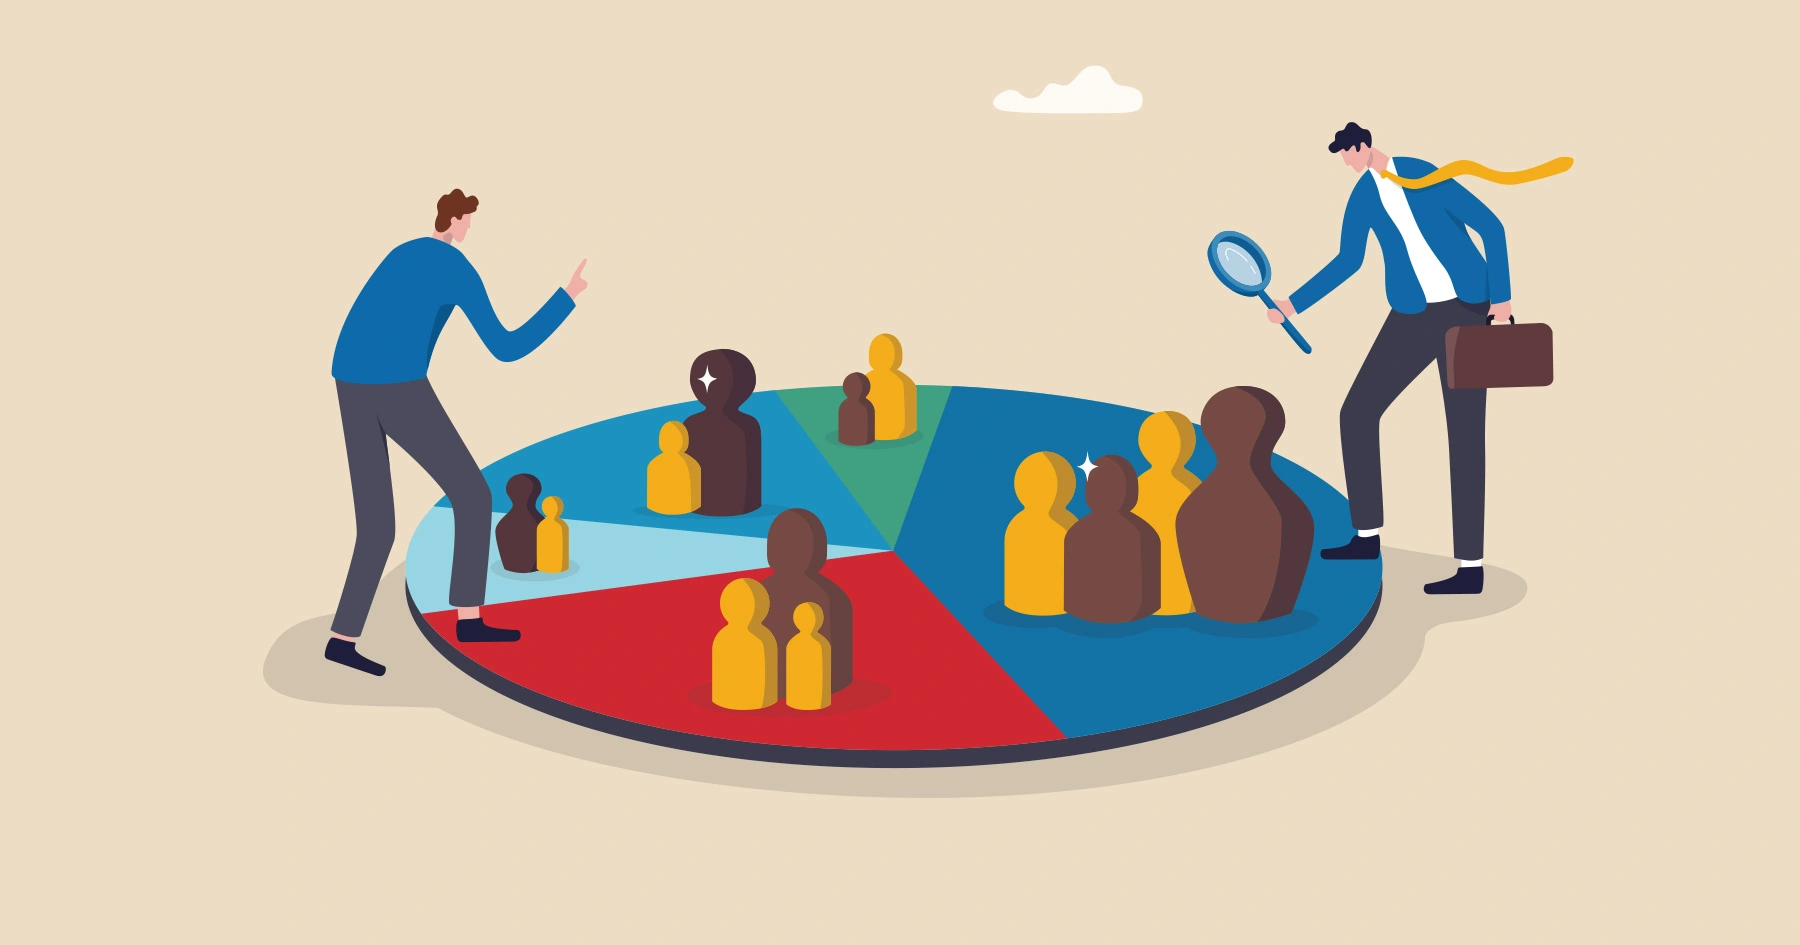

    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. EDA](#5) 
      
* [6. RECENCY](#6)
    
* [7. FREQUENCY](#7)
    
* [8. MONETARY](#8)
    
* [9. CLUSTERING](#9)
    
* [10. CONCLUSION](#10)

* [10. END](#11)

<a id="1"></a>
# 📚 `Importing Libraries`

In [1]:
import pandas as pd #library for handling tabular data
import numpy as np #library for Computations
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
import warnings #library for stopping warnings
warnings.filterwarnings('ignore')
import plotly.express as px # library for visualization

<a id="2"></a>
# ███████▒▒▒ 70% `Loading Data`

In [2]:
df= pd.read_excel(r'Online Retail.xlsx') #Reading excel file
df.head() #Displaying Top five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.tail() #Displaying Bottom five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. 
- StockCode: Product (item) code. 
- Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name.
- Quantity: The quantities of each product (item) per transaction. Numeric. 
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

<a id="3"></a>
# 🧹 Data Cleaning

In [4]:
df.shape #Dimension of Dataset

(541909, 8)

In [5]:
df.info() # Information of dataset datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['Description']=df["Description"].fillna("Missing")
df=df.dropna()
df['Country']=df["Country"].astype('category')

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.shape

(406829, 8)

In [10]:
df.duplicated(keep='first').sum()

5225

In [11]:
df=df.drop_duplicates()
df.shape

(401604, 8)




<a id="4"></a>
# Data  Preprocessing

In [12]:
df['Total_purchase']=df['Quantity']*df['UnitPrice']
df['Day_of_week'] = df['InvoiceDate'].dt.weekday # 0 is monday and 6 is sunday
df['Month'] = df['InvoiceDate'].dt.month # 1 is january and 12 is December
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_purchase,Day_of_week,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
Total_purchase,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6
Day_of_week,401604.0,2.598811,1.917504,0.0,1.00,2.00,4.00,6.0
Month,401604.0,7.595407,3.417451,1.0,5.00,8.00,11.00,12.0


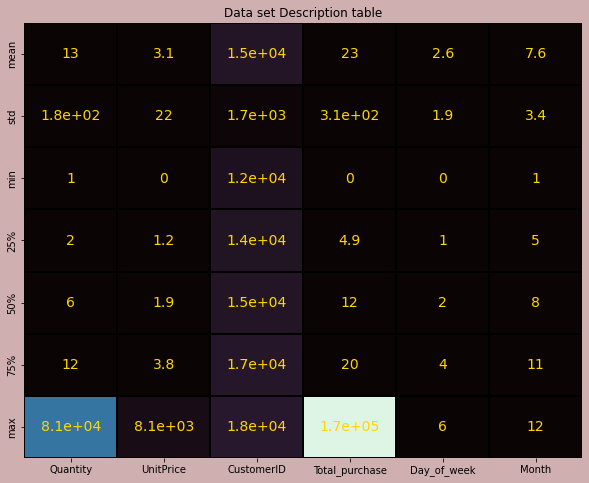

In [51]:
plt.figure( figsize=(10,8),facecolor='#CFAFAF')
sns.heatmap(df.describe()[1:],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'#FFD700'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)
plt.title('Data set Description table')
plt.show()

- From `Description` Table we can observe negative values in a quality column and `Total Purchase`  which states order cancellation


<a id="5"></a>
# 🗺️ EDA

In [15]:
df.loc[df['Quantity']<0].head(5) #cancelled orders `Invoice no starts with C`


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_purchase,Day_of_week,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12


In [16]:
df.loc[df['Quantity']<0].shape # total `8.8K` orders canclled

(8872, 11)

- Out of 500K orders around 8.8k orders are returned to store

In [17]:
df = df[(df['Quantity']>0)]
df.shape

(392732, 11)

- Total orders left after filtering is 392K 

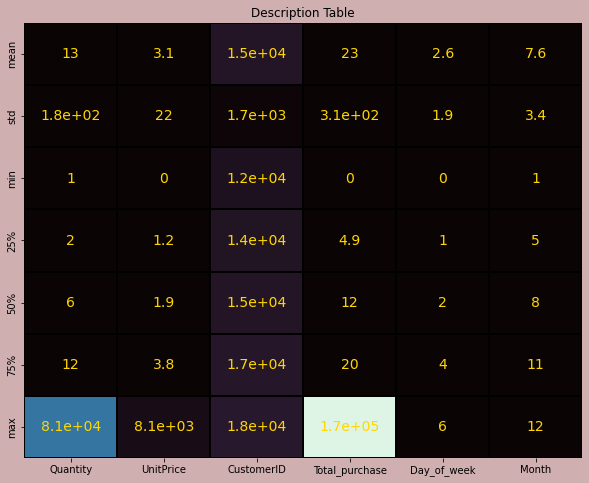

In [53]:
plt.figure( figsize=(10,8),facecolor='#CFAFAF')
sns.heatmap(df.describe()[1:],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'#FFD700'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)
plt.title('Description Table')
plt.show()

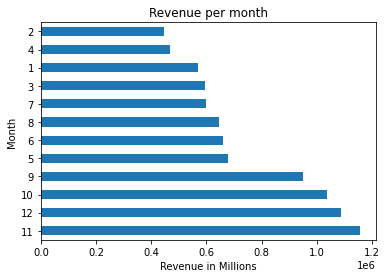

In [61]:
df.groupby(['Month'])['Total_purchase'].sum().nlargest(12).plot(kind='barh')
plt.xlabel('Revenue in Millions')
plt.title('Revenue per month')
plt.show()

 - month september,October,November and December has sales more than 1.0 Million Sterlins,due to more local and Global events held in these months example `Christmas` and `Hallowen` are held in these months

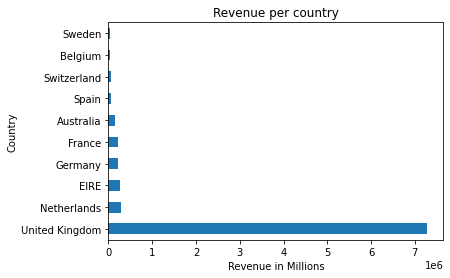

In [62]:
df.groupby(['Country'])['Total_purchase'].sum().nlargest(10).plot(kind='barh')
plt.xlabel('Revenue in Millions')
plt.title('Revenue per country')
plt.show()

- Uinited kingdom has total purchase value of `7-Million sterlings pounds`,followed by Netherlands with `0.4-Million Steriling Pounds`

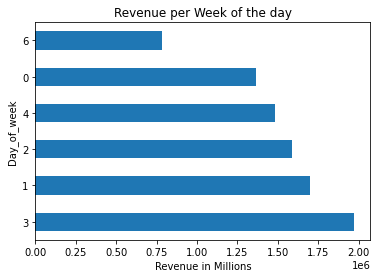

In [63]:
x=df.groupby(['Day_of_week'])['Total_purchase'].sum().nlargest(7)
x.plot(kind='barh')
plt.xlabel('Revenue in Millions')
plt.title('Revenue per Week of the day')
plt.show()

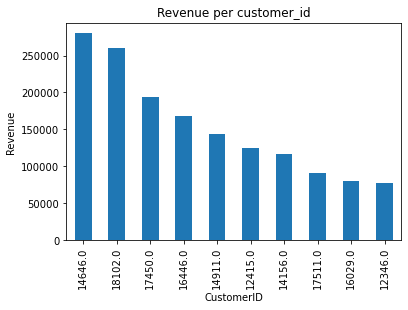

In [64]:
df.groupby(['CustomerID'])['Total_purchase'].sum().nlargest(10).plot(kind='bar')
plt.ylabel('Revenue ')
plt.title('Revenue per customer_id')
plt.show()

- we can observe customer id `14646.0` from united kingdom has purchased value of `280K sterling pounds` followed by `18102` with `260K sterling pound`.

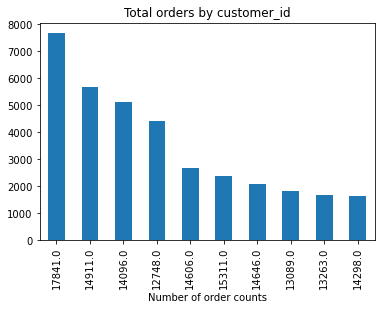

In [65]:
df.groupby(['CustomerID'])['CustomerID'].count().nlargest(10).plot(kind='bar')
plt.xlabel('Number of order counts')
plt.title('Total orders by customer_id')
plt.show()

- we can observe customer id `17841.0` from united kingdom has puchased 7.4k times highest among 500K records followed by `149110` From EIIRE has orderd more than 5K times there are more than 100 customes has purchase time more than 1k times

In [67]:
df.groupby(['Description','Country'])['Description'].count().nlargest(10)

Description                         Country       
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom    1929
JUMBO BAG RED RETROSPOT             United Kingdom    1461
REGENCY CAKESTAND 3 TIER            United Kingdom    1417
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom    1320
PARTY BUNTING                       United Kingdom    1301
LUNCH BAG RED RETROSPOT             United Kingdom    1135
LUNCH BAG  BLACK SKULL.             United Kingdom    1022
SET OF 3 CAKE TINS PANTRY DESIGN    United Kingdom    1013
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     967
HEART OF WICKER SMALL               United Kingdom     946
Name: Description, dtype: int64

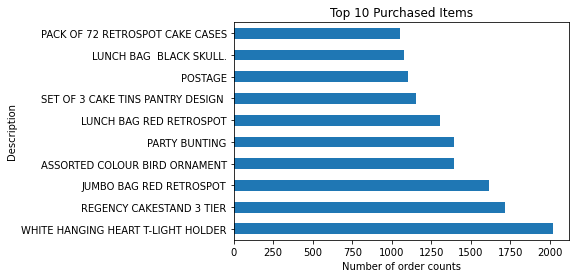

In [66]:
df.groupby(['Description'])['Description'].count().nlargest(10).plot(kind='barh')
plt.xlabel('Number of order counts')
plt.title('Top 10 Purchased Items')
plt.show()

- WHITE HANGING HEART T-LIGHT HOLDER : White Dollar Pendent was highest purchased Item.
- REGENCY CAKESTAND 3 TIER : 3 steps cake holding stand
- JUMBO BAG RED RETROSPOT : red color bag to store toys or footware
- ASSORTED COLOUR BIRD ORNAMENT :colourful sparow hangings
- PARTY BUNTING  :Colour papers to decorate wall
- LUNCH BAG RED RETROSPOT:red color bag to store  Lunch
- SET OF 3 CAKE TINS PANTRY DESIGN :Cake storage boxes 3 nos
- LUNCH BAG  BLACK SKULL :Lunch Bag has SKULL print on it
- POSTAGE : Sending Letters by paying Cash
- PACK OF 72 RETROSPOT CAKE CASES:Cupcake packing Papers
-The above listed top 10 items which people buy on occasion on chirstmas many people brought cake distribution and related items

 - From the `EDA` We can observe `UK` has more number of customers and puchase quantity is high in this country so we will perform Customer segmentaion for uk only and we will culster 3 groups of customer on their purcasing  pattern

In [26]:
df1=df.loc[df['Country']=='United Kingdom']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_purchase,Day_of_week,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [27]:
df1.shape


(349227, 11)

<a id="6"></a>
# 📆 RECENCY

In [28]:
df_recency = df1.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


<AxesSubplot:ylabel='Frequency'>

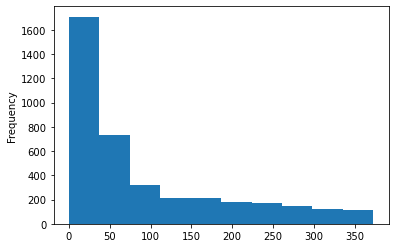

In [29]:
df_recency['Recency'].plot(kind='hist')


<a id="7"></a>
# 🌊 FREQUENCY

In [30]:
frequency_df = df1.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


<a id="8"></a>
# 💸 MONETARY

In [31]:
monetary_df = df1.groupby(by='CustomerID', as_index=False)['Total_purchase'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [32]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34


In [33]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,1,77183.60,3.635895,0.918133,0.918133
1,12747.0,1,103,4196.01,97.924188,76.319816,76.319816
2,12748.0,0,4413,33053.19,100.000000,99.948993,99.948993
3,12749.0,3,199,4090.88,93.514698,89.811273,89.811273
4,12820.0,2,59,942.34,95.887055,61.094109,61.094109


In [34]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05

rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.07
1,12747.0,3.98
2,12748.0,5.00
3,12749.0,4.52
4,12820.0,3.32
5,12821.0,0.46
6,12822.0,2.60


<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

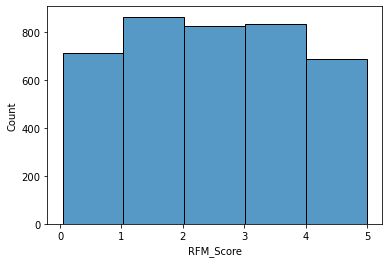

In [35]:
sns.histplot(rfm_df['RFM_Score'],bins=5)

In [36]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.0, "Gold Customer",
                                        
                                        (np.where(rfm_df['RFM_Score'] > 3.0,
                             'silver Customer',
                            'Bronze Customer')))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.07,Bronze Customer
1,12747.0,3.98,silver Customer
2,12748.0,5.00,Gold Customer
3,12749.0,4.52,Gold Customer
4,12820.0,3.32,silver Customer
5,12821.0,0.46,Bronze Customer
6,12822.0,2.60,Bronze Customer
7,12823.0,0.56,Bronze Customer
8,12824.0,1.86,Bronze Customer
9,12826.0,3.83,silver Customer


In [37]:
rfm_df['Customer_segment']

0       Bronze Customer
1       silver Customer
2         Gold Customer
3         Gold Customer
4       silver Customer
             ...       
3916    Bronze Customer
3917    Bronze Customer
3918    Bronze Customer
3919      Gold Customer
3920    silver Customer
Name: Customer_segment, Length: 3921, dtype: object

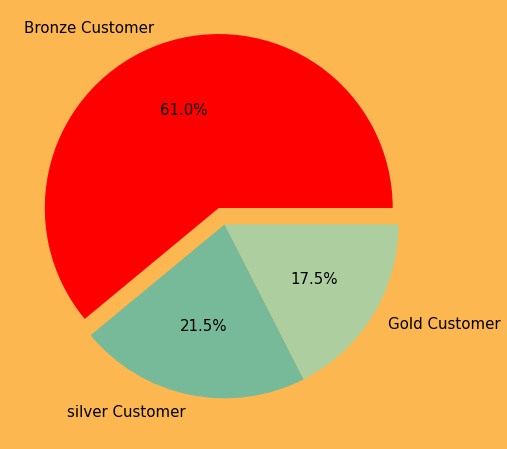

In [38]:

plt.figure(figsize=(8,8), facecolor='#FDB750')
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.01f%%', colors=['red','#76BA99','#ADCF9F'],  explode=[0.1,0,0],textprops = {"fontsize":15})
plt.show()

- Gold customers: These are the customers who make frequent purchases and spend a significant amount of money on your products or services. They are the most valuable customers and typically represent a small percentage of your customer base. Gold customers should be treated with special care and offered exclusive perks, rewards, and personalized experiences to maintain their loyalty and maximize their lifetime value.

- Silver customers: These are customers who make regular purchases but spend less than Gold customers. They may not be as loyal or valuable as Gold customers, but they still contribute significantly to your revenue. Silver customers should be nurtured with targeted promotions, relevant content, and excellent customer service to encourage them to continue doing business with you.

- Bronze customers: These are customers who make occasional purchases and spend the least amount of money compared to Gold and Silver customers. They may be new customers or infrequent buyers who need more persuasion to become loyal to your brand. Bronze customers should be given incentives to increase their purchase frequency and spend, such as discounts, free trials, or personalized recommendations.


<a id="9"></a>
#  ✨ Clustering

In [39]:
df_final=rfm_df.drop(['R_rank_norm','F_rank_norm','M_rank_norm','RFM_Score','Customer_segment'],axis=1)
df_final.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34


In [40]:
df_final.shape

(3921, 4)

In [41]:
X=df_final

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
tips_ds_scaled = ss.fit_transform(X)

### Kmeans Clustering algorithm

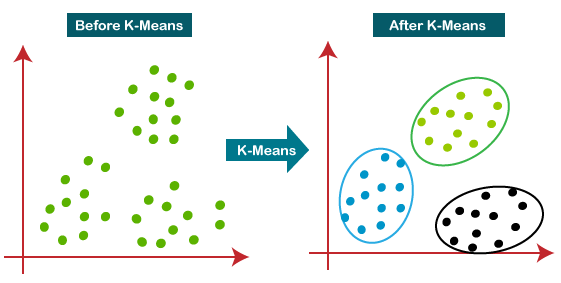
- KMeans clustering is a popular unsupervised machine learning algorithm used for grouping similar data points together into clusters. The algorithm works by randomly selecting k number of centroids, where k is the number of clusters desired. Then, it assigns each data point to the nearest centroid based on the Euclidean distance between the centroid and the data point.

- After all the data points have been assigned to their respective centroids, the centroid locations are recalculated based on the mean position of all the points assigned to each centroid. This process of assigning data points to centroids and recalculating the centroid locations continues until the centroids no longer move significantly.

- The algorithm tries to minimize the within-cluster sum of squares, which is the sum of the squared distances between each data point and its assigned centroid. This is achieved by iteratively updating the centroids until convergence. The final result is a set of k clusters, where each cluster contains data points that are similar to each other and dissimilar to the data points in other clusters.

In [43]:
from sklearn.cluster import KMeans
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(tips_ds_scaled)
    wcss.append(kmeans.inertia_)

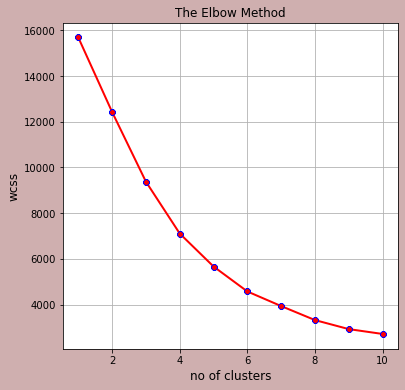

In [44]:
plt.figure(figsize=(6,6),facecolor='#CFAFAF')
plt.plot(range(1,11), wcss,linewidth=2, color="red", marker ="8",markeredgecolor='blue')
plt.title('The Elbow Method')
plt.xlabel('no of clusters',fontsize=12)
plt.ylabel('wcss',fontsize=12)
plt.grid()
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
y=kmeans.fit_predict(tips_ds_scaled)

In [46]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tips_ds_scaled, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.32


In [47]:
df_final['clusters']=y
df_final.head()

,CustomerID,Recency,Frequency,Monetary,clusters
0,12346.0,325,1,77183.60,2
1,12747.0,1,103,4196.01,0
2,12748.0,0,4413,33053.19,2
3,12749.0,3,199,4090.88,0
4,12820.0,2,59,942.34,0


<AxesSubplot:xlabel='clusters', ylabel='count'>

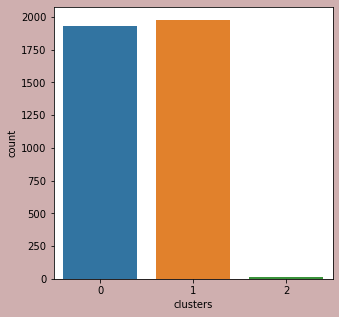

In [48]:
plt.figure (figsize = (5 , 5),facecolor='#CFAFAF')
sns.countplot(df_final["clusters"])

<a id="10"></a>
# 🤓 Conclusion

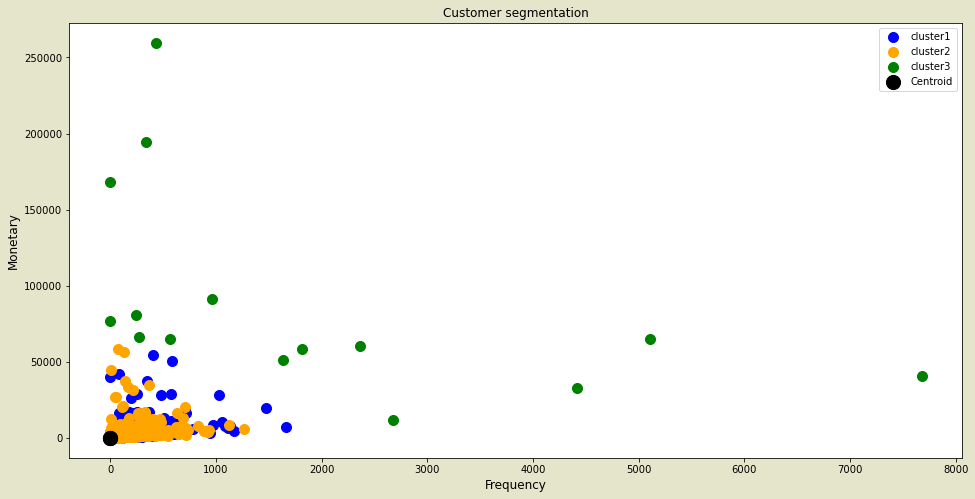

In [49]:
df2=df_final.drop('clusters',axis=1)
df2.head()
plt.figure(figsize=(16,8),facecolor='#E5E5CB')
plt.scatter(df2.iloc[y==0,2],df2.iloc[y==0,3],s=100,c='blue',label='cluster1')
plt.scatter(df2.iloc[y==1,2],df2.iloc[y==1,3],s=100,c='orange',label='cluster2')
plt.scatter(df2.iloc[y==2,2],df2.iloc[y==2,3],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='Black',label='Centroid')
plt.title('Customer segmentation')
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Monetary',fontsize=12)
plt.legend()
plt.show()

- `Green Dots`: Indicates cluster-3 customers who visits store frequntly and also repsonsible for high monetray purchase.These customers are likely to be loyal and may have a higher lifetime value compared to customers in other segments. Therefore, it may be important for the business to focus on `retaining these customers and offering them personalized promotions or rewards to encourage continued patronage`.



- `Blue Dots` : Indicates Cluster-1 customers with moderate frequency visit and responsible for average monetary purchase.These     customers may be more price-sensitive and less loyal compared to Cluster-3 customers. The business may want to focus on       attracting new customers `from this segment and providing them with incentives to increase their purchase frequency and amount`.



- `Orange dots`:Indicates Cluster-2  Customers with less Frequency Visit and Responsible for low Monetary purchase, may represent the least valuable segment for the business. However, it may still be important to maintain some level of engagement with these customers to prevent them from switching to competitors. `The business may want to offer promotions or discounts to encourage these customers to visit more frequently and increase their purchase amount`.






<a id="11"></a>
# 🔚 END